In [29]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [30]:
df = pd.read_excel('data_1_to_50.xlsx')
df.head()

,Unnamed: 0,Address,Area,Price per m2,Room,WC,Price
0,0,"·\nQuận 9, Hồ Chí Minh",120 m²,91.67 tr/m²,6.0,6.0,11 tỷ
1,1,"·\nTân Bình, Hồ Chí Minh",34.5 m²,162.32 tr/m²,3.0,2.0,5.6 tỷ
2,2,"·\nHóc Môn, Hồ Chí Minh",156 m²,16.67 tr/m²,4.0,4.0,2.6 tỷ
3,3,"·\nHóc Môn, Hồ Chí Minh",130 m²,21.54 tr/m²,3.0,3.0,2.8 tỷ
4,4,"·\nBình Tân, Hồ Chí Minh",87 m²,91.95 tr/m²,NaN,NaN,8 tỷ


In [31]:
len(df)

1000

In [32]:
#kiểm tra số lượng NULL
df.isnull().sum()

Unnamed: 0        0
Address           0
Area              0
Price per m2     60
Room            172
WC              244
Price             0
dtype: int64

In [33]:
# đếm các giá trị trong cột Price
df['Price'].value_counts()

Giá thỏa thuận    60
4.5 tỷ            16
3.5 tỷ            16
7.5 tỷ            15
8.5 tỷ            15
                  ..
16.29 tỷ           1
2.38 tỷ            1
39.5 tỷ            1
15.49 tỷ           1
780 triệu          1
Name: Price, Length: 293, dtype: int64

In [34]:
# xóa column Price per m2, vì cloumn này
# là của column Price / column Area
df1 = df[['Address','Area','Room','WC','Price']]
# xóa các row có price là giá thoat thuận
df1 = df1[df1.Price != 'Giá thỏa thuận']
len(df1)


940

In [35]:
df1.head()

,Address,Area,Room,WC,Price
0,"·\nQuận 9, Hồ Chí Minh",120 m²,6.0,6.0,11 tỷ
1,"·\nTân Bình, Hồ Chí Minh",34.5 m²,3.0,2.0,5.6 tỷ
2,"·\nHóc Môn, Hồ Chí Minh",156 m²,4.0,4.0,2.6 tỷ
3,"·\nHóc Môn, Hồ Chí Minh",130 m²,3.0,3.0,2.8 tỷ
4,"·\nBình Tân, Hồ Chí Minh",87 m²,NaN,NaN,8 tỷ


In [36]:
# clean data
# xóa tên thành phố, chỉ còn tên quận hoặc huyện
def remove_detail_address(text):
    text = re.sub("·\n", "", text)
    text = re.sub(", Hồ Chí Minh","", text)
    return text

# xóa m2 trong diện tích và chuyễn sang kiểu float
def remove_m2(text):
    text = re.sub(" m²", "", text)
    num = float(text)
    return num

# chuyển giá về cùng 1 định giá (TỶ)
def convert_price(text):
    x = re.search("tỷ", text)
    if x:
        text = re.sub(" tỷ",'', text)
        num = float(text)
        return num
    else:
        text = re.sub(" triệu","",text)
        num = float(text)
        return num

In [37]:
df1['Address'] = df1['Address'].apply(remove_detail_address)
df1['Area']=df1['Area'].apply(remove_m2)
df1['Price']=df1['Price'].apply(convert_price)
df1.head()

,Address,Area,Room,WC,Price
0,Quận 9,120.0,6.0,6.0,11.0
1,Tân Bình,34.5,3.0,2.0,5.6
2,Hóc Môn,156.0,4.0,4.0,2.6
3,Hóc Môn,130.0,3.0,3.0,2.8
4,Bình Tân,87.0,NaN,NaN,8.0


<Axes: ylabel='Frequency'>

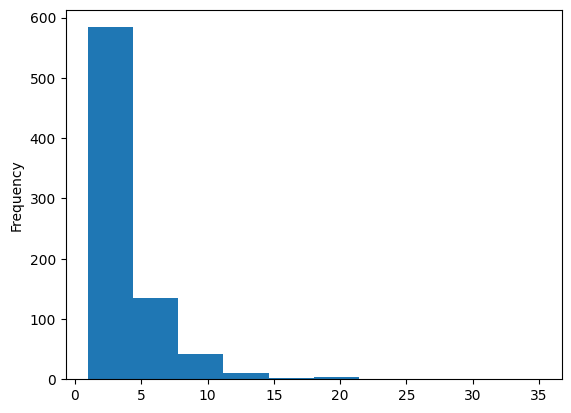

In [38]:
df1['Room'].plot(kind="hist")

<Axes: ylabel='Frequency'>

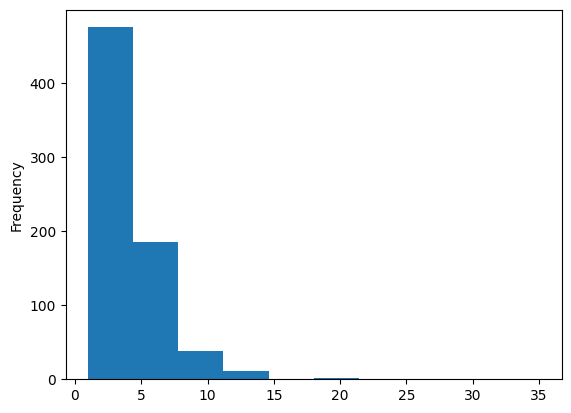

In [39]:
df1['WC'].plot(kind="hist")

In [40]:
print(df1['Room'].mean())
print(df1['Room'].median())

4.1461538461538465
4.0


In [41]:
print(df1['WC'].mean())
print(df1['WC'].median())

4.085314685314685
4.0


In [42]:
# chèn data bị miss bằng median value
# sử dụng giá trị median vì giữa 2 giá trị mean và median không chênh lệch nhiều
# và feature ROOM và WC là số dương, do đó chọn median là hợp lí
df1['Room'].fillna(df1['Room'].median(), inplace = True)
df1['WC'].fillna(df1['WC'].median(), inplace = True)
df1.head()

,Address,Area,Room,WC,Price
0,Quận 9,120.0,6.0,6.0,11.0
1,Tân Bình,34.5,3.0,2.0,5.6
2,Hóc Môn,156.0,4.0,4.0,2.6
3,Hóc Môn,130.0,3.0,3.0,2.8
4,Bình Tân,87.0,4.0,4.0,8.0


In [43]:
df1.to_excel('after_preprocessing.xlsx')